In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# There is so many NA and Null value so we will replace with some value

In [5]:
#Sum of null value
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null

,Null %
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
...,...
ExterQual,0.00
Exterior2nd,0.00
Exterior1st,0.00
RoofMatl,0.00


# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'

In [7]:
null_value_column = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_value_column:
    data[i].fillna("none", inplace=True)

In [8]:
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null

,Null %
LotFrontage,17.74
GarageYrBlt,5.55
MasVnrArea,0.55
Electrical,0.07
KitchenAbvGr,0.00
...,...
ExterQual,0.00
MasVnrType,0.00
Exterior2nd,0.00
Exterior1st,0.00


In [9]:
# Check nulls once again

data.columns[data.isnull().any()] 

null_2 = data.isnull().sum()/len(data)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [10]:
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
data.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [12]:
data.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [13]:
data.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [14]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

data['LotFrontage'] = data['LotFrontage'].replace(np.nan, data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan, data['MasVnrArea'].median())

In [15]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)

In [16]:
data["Electrical"].dropna(inplace=True)

In [17]:
# Crosscheck the updated 'LotFrontage' column
data['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
data['GarageYrBlt'].describe()

count    1460.000000
mean     1868.739726
std       453.697295
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [19]:
data['MasVnrArea'].describe()


count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [20]:

data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [21]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,12,2008,WD,Normal,250000


In [22]:
data =data.drop('Id', axis= 1)

In [23]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,none,none,none,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,none,none,none,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,none,none,none,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,0,none,none,none,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,none,none,none,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,none,Reg,Lvl,AllPub,Inside,...,0,none,none,none,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,none,Reg,Lvl,AllPub,Inside,...,0,none,MnPrv,none,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,none,Reg,Lvl,AllPub,Inside,...,0,none,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,none,Reg,Lvl,AllPub,Inside,...,0,none,none,none,0,4,2010,WD,Normal,142125


In [24]:
data.nunique().sort_values(ascending = True)

Street            2
CentralAir        2
Utilities         2
PavedDrive        3
HalfBath          3
               ... 
TotalBsmtSF     721
1stFlrSF        753
BsmtUnfSF       780
GrLivArea       861
LotArea        1073
Length: 80, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

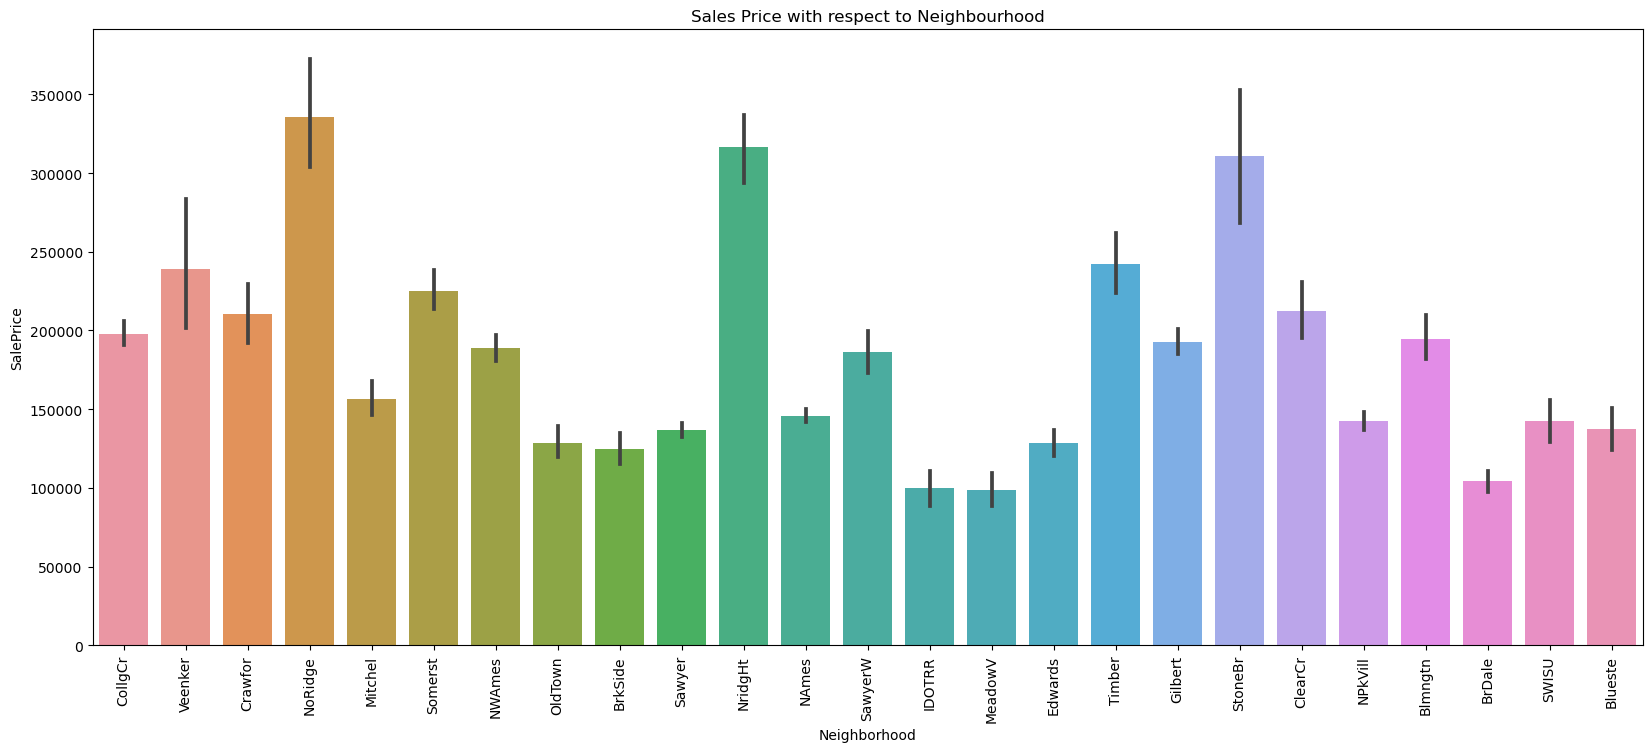

In [25]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

# Properties in some of the Neighborhoods are high priced.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

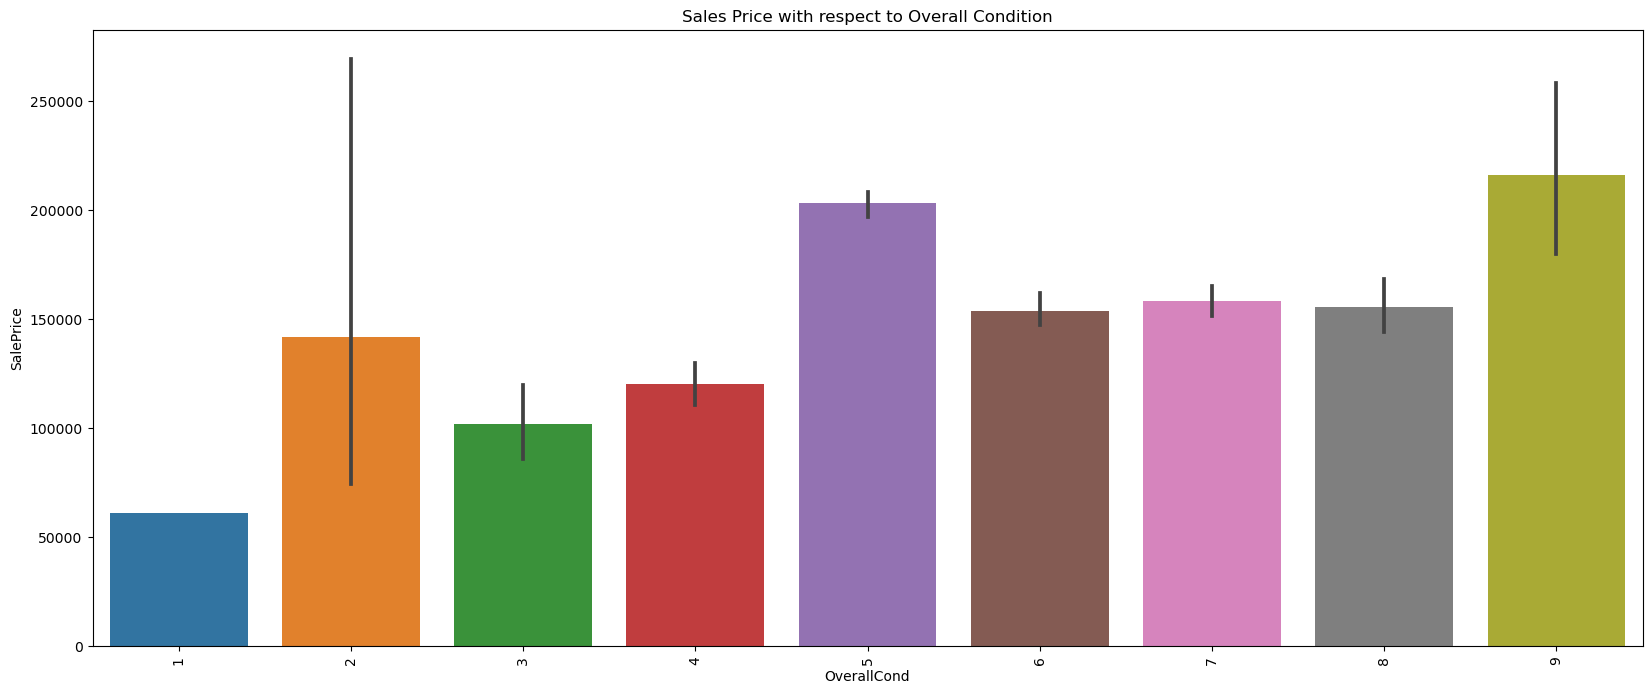

In [26]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

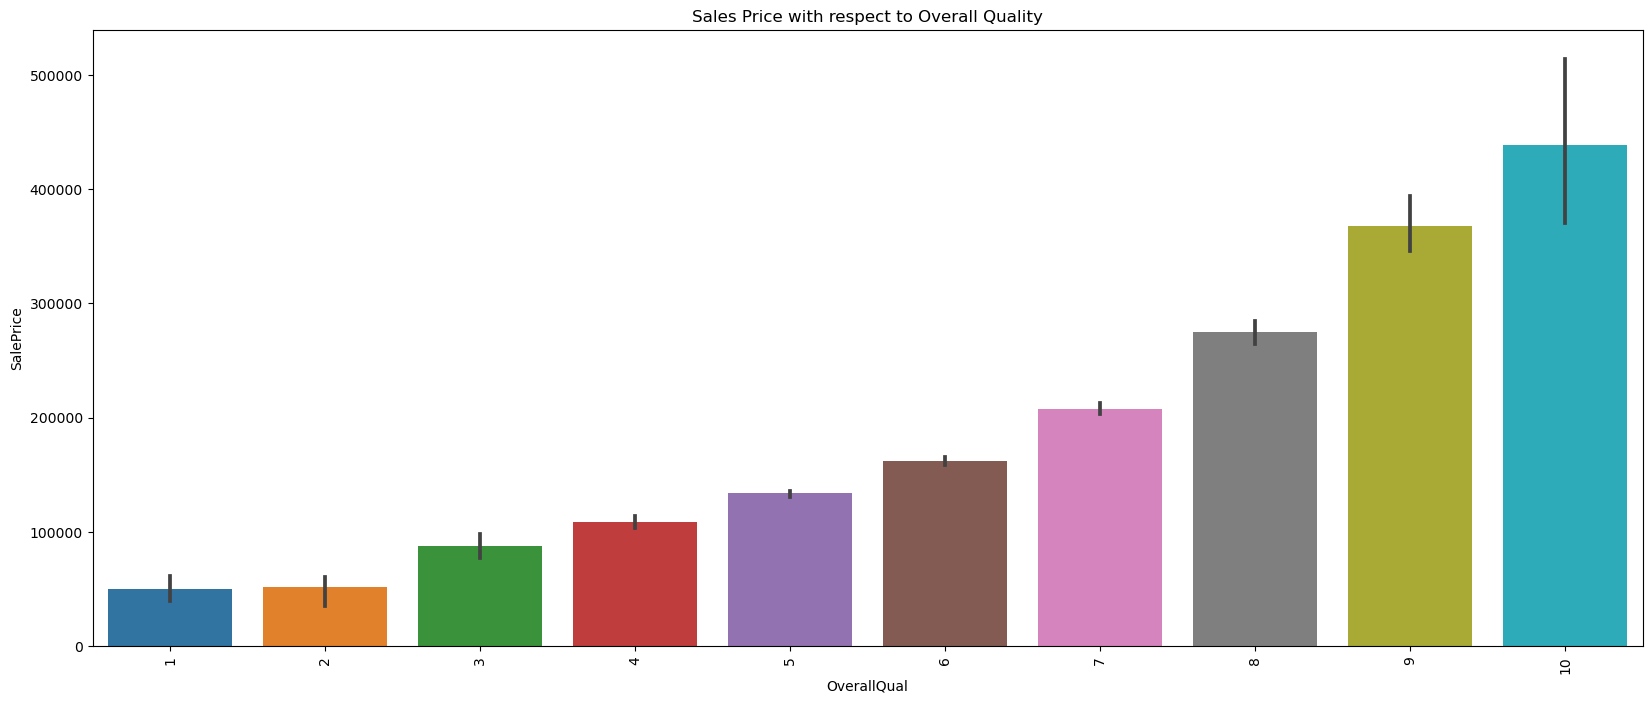

In [27]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

<Axes: xlabel='SalePrice', ylabel='Density'>

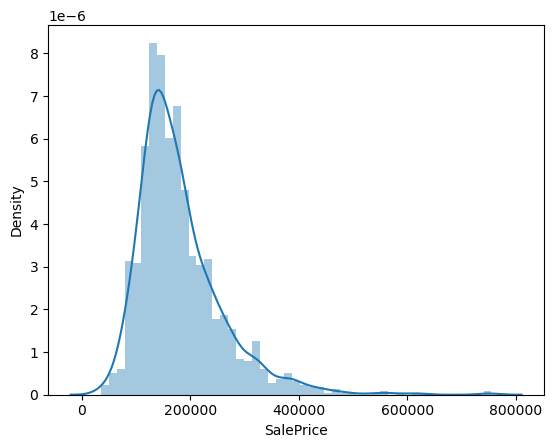

In [28]:
sns.distplot(data['SalePrice'])

In [29]:
data_raw = data.copy

# Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

<Axes: xlabel='SalePrice', ylabel='Density'>

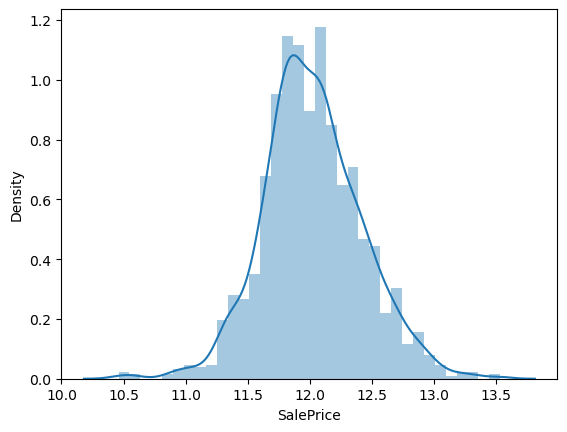

In [30]:
#Log Transformation
data['SalePrice']=np.log1p(data['SalePrice'])
sns.distplot(data['SalePrice'])

In [31]:
# correlation matrix
cor = data.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.335292
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.426776
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


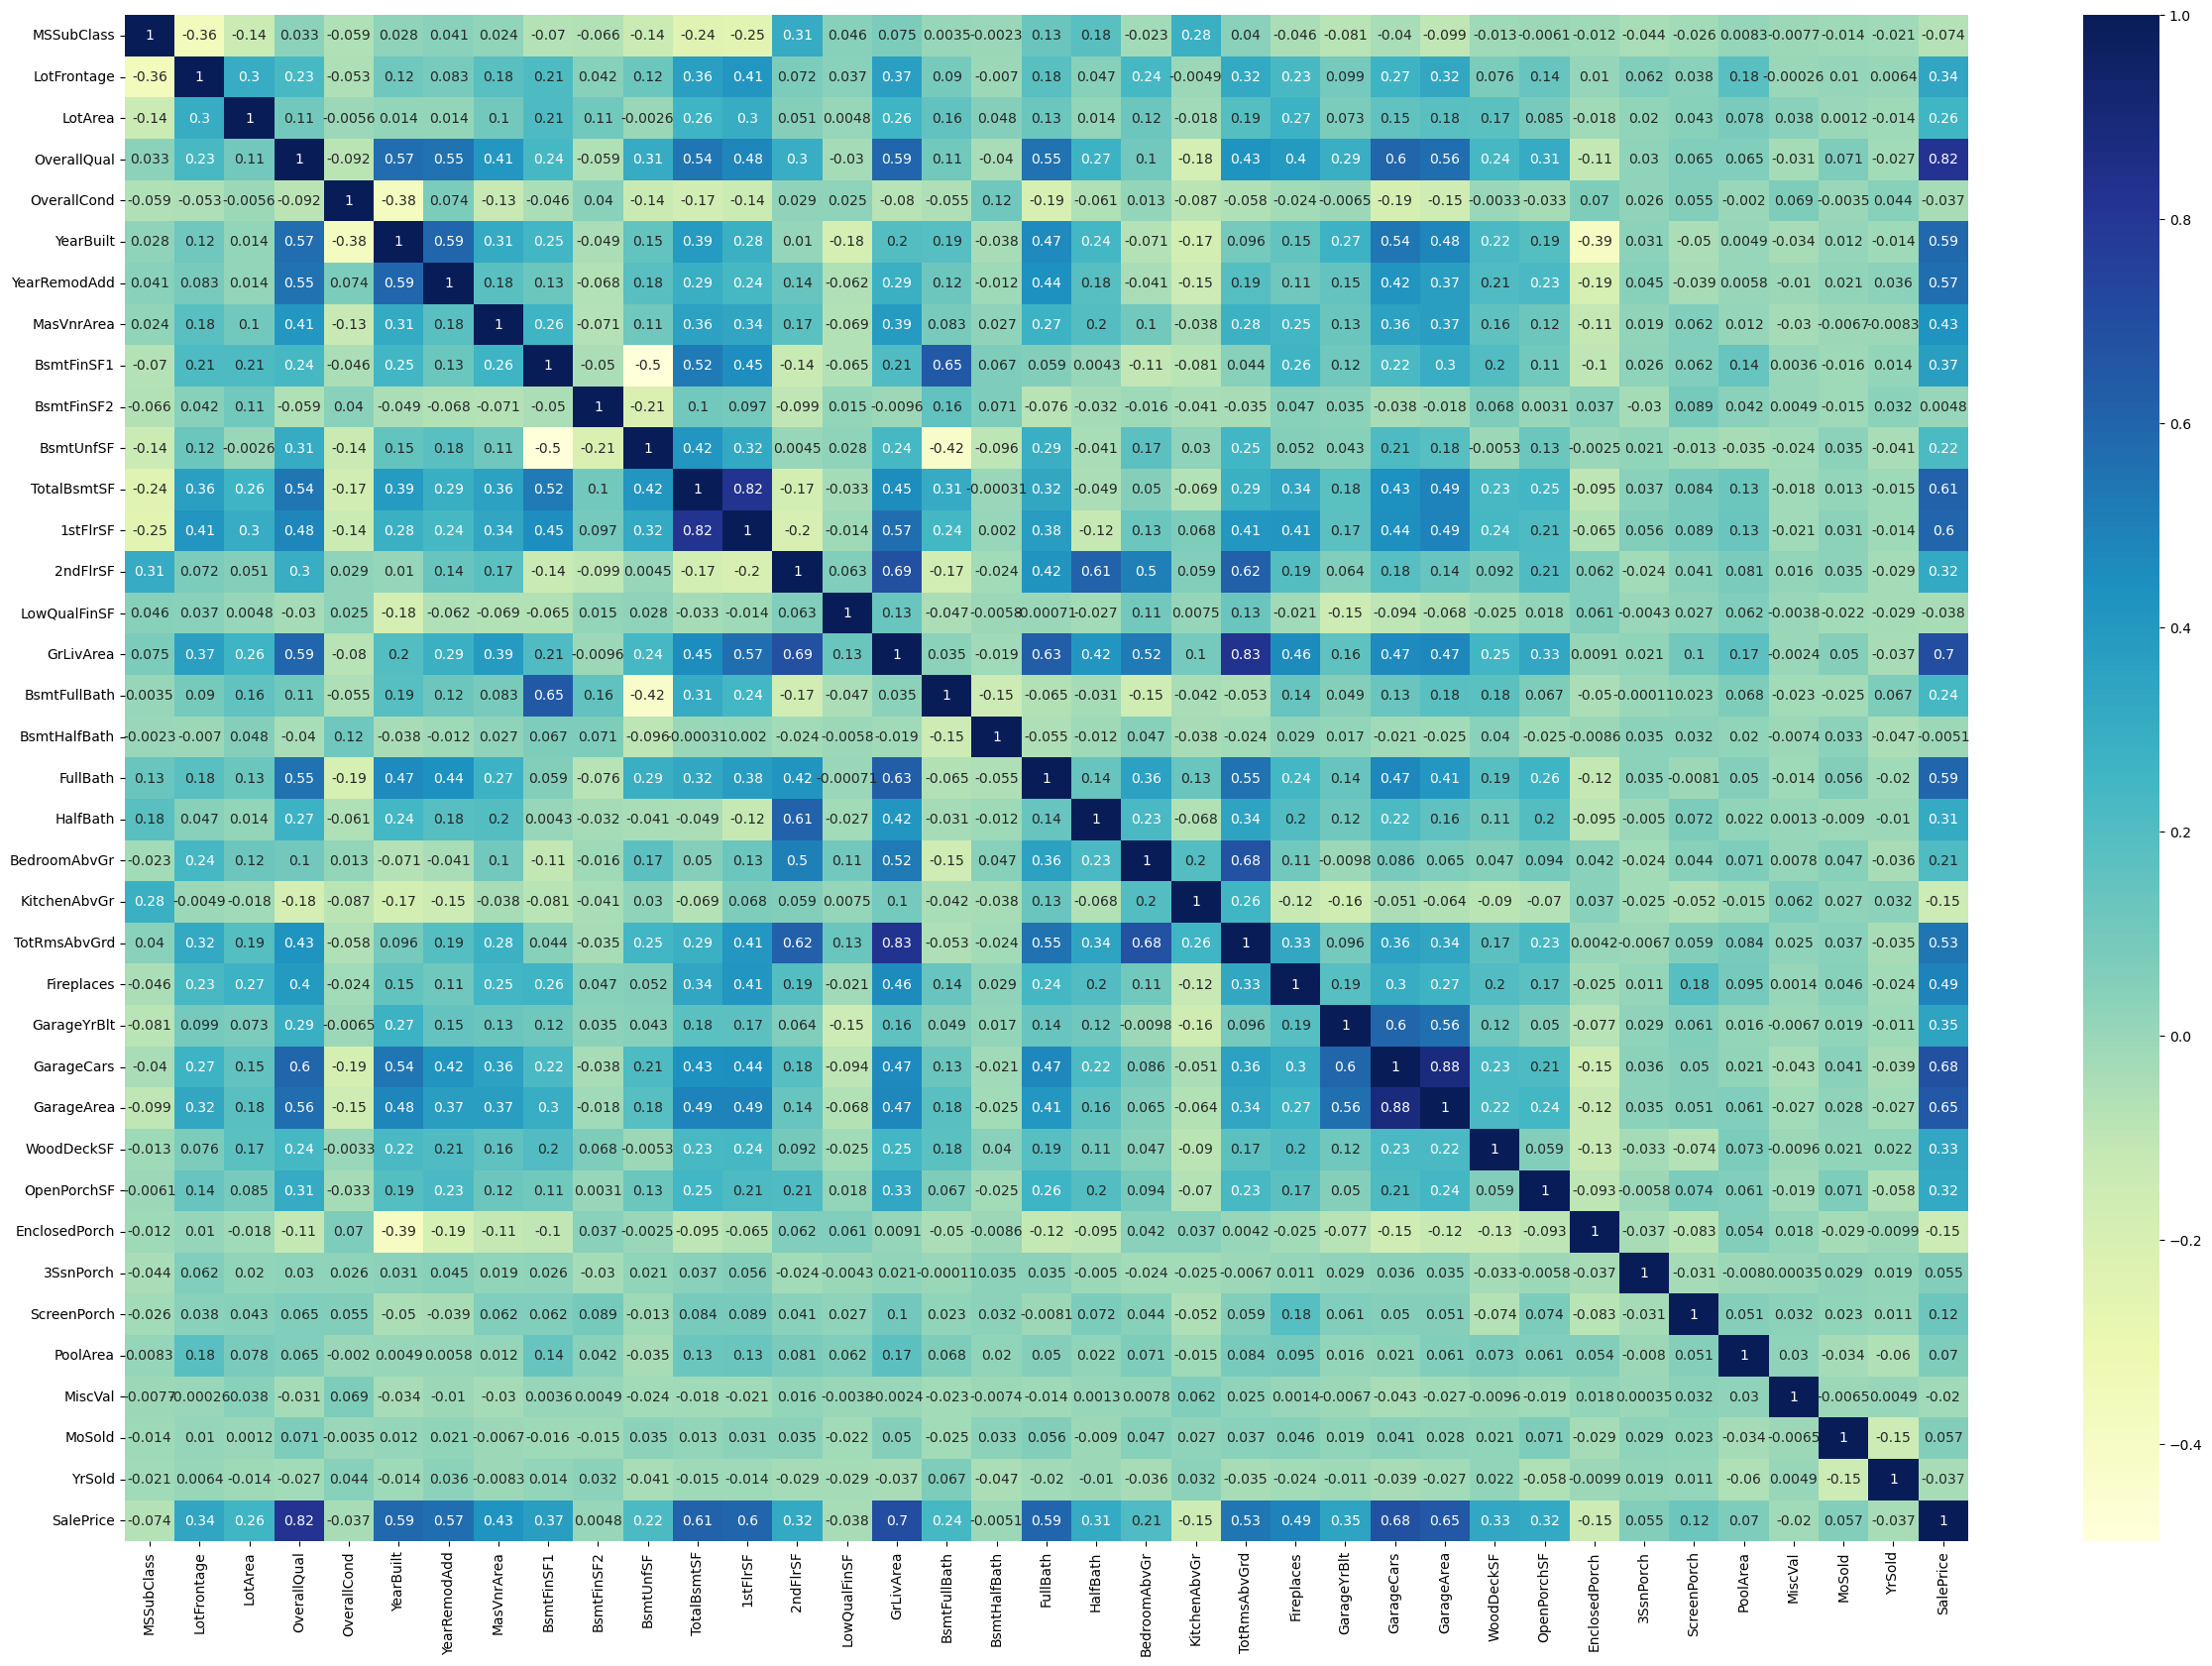

In [32]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# We can see that some of the variables are correlated so we need to drop them

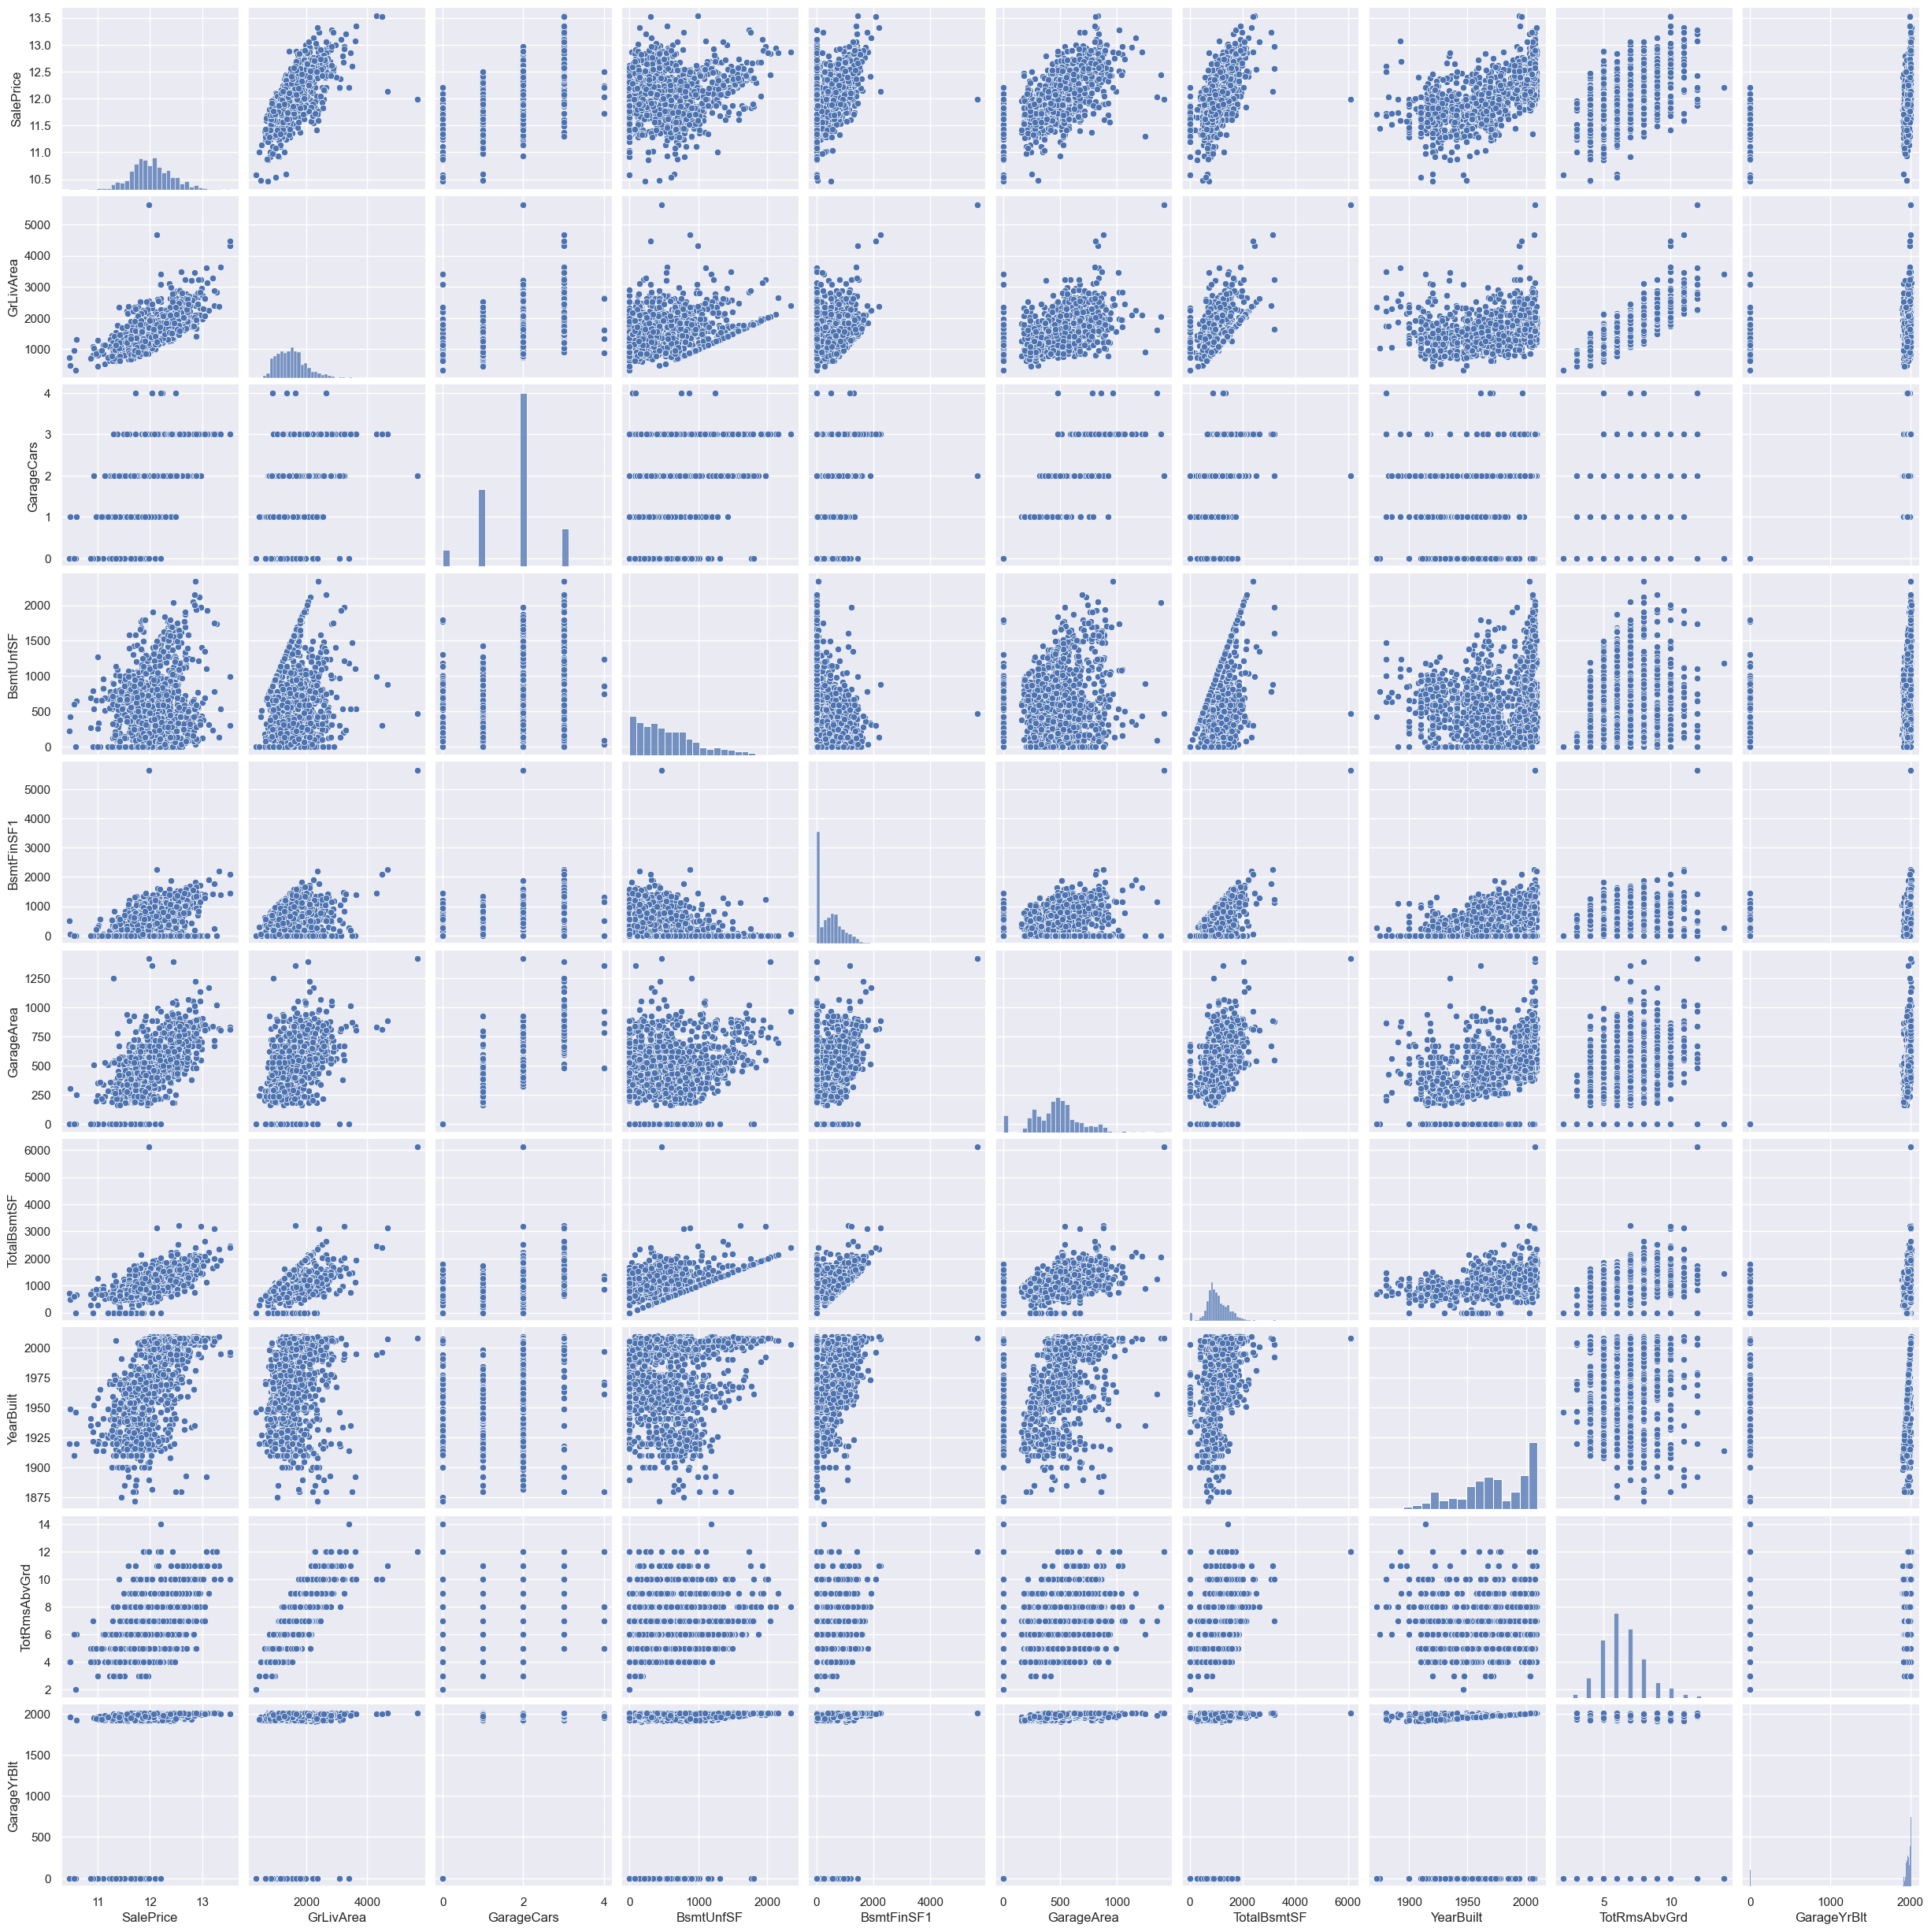

In [33]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

In [34]:
data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,none,none,none,0,12,2008,WD,Normal,12.429220


In [35]:
data.nunique().sort_values(ascending= True)

Street            2
Utilities         2
CentralAir        2
PavedDrive        3
HalfBath          3
               ... 
SalePrice       663
TotalBsmtSF     721
1stFlrSF        753
GrLivArea       861
LotArea        1073
Length: 76, dtype: int64

In [36]:
data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [37]:
data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [38]:
data.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [39]:
# We can also drop columns that show very low variance and thus not required for predictions
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

In [40]:
l2= data.select_dtypes(include=['float64', 'int64'])
l2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,12.072547
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,12.254868
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,12.493133
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,11.864469


In [41]:
data.PoolArea.value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [42]:
data.ScreenPorch.value_counts()

0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64

In [43]:
 data = data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)
    

In [44]:
data.shape

(1460, 65)

# 3. Data Preparation

# Let's now prepare the data and build the model.

In [45]:
# type of each feature in data: int, float, object
types = data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [46]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      29
float64     3
Name: 0, dtype: int64

In [47]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice']


In [48]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


# Creating Dummy columns

In [49]:
data = pd.get_dummies(data, drop_first=True )
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [50]:
X = data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
# Putting response variable to y
y = data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [52]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)


In [53]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces' , 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,-0.870387,0.637608,0.166080,-0.059996,1.252715,-0.688358,0.773891,-0.575015,0.085426,-0.283127,...,0,0,0,0,1,0,0,0,1,0
1408,0.304785,-0.424957,-0.261043,-1.501313,1.252715,-1.999823,-1.680267,-0.575015,-0.943351,-0.283127,...,0,0,0,0,1,0,0,0,1,0
1148,-0.165284,-0.026495,-0.439778,0.660663,1.252715,-1.475237,-1.680267,-0.575015,-0.943351,-0.283127,...,0,0,0,0,1,0,0,0,1,0
861,3.125199,0.239147,0.079341,-0.780655,-1.406374,-0.196559,-0.958456,-0.575015,0.870488,-0.283127,...,0,0,0,0,1,0,0,0,1,0
220,-0.870387,0.150599,-0.151525,0.660663,-0.520011,1.147692,1.014495,-0.575015,-0.943351,-0.283127,...,0,0,1,0,0,0,0,0,0,1


In [58]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-3.479641e-18,1.635431e-16,1.565839e-17,1.513644e-16,-3.201270e-16,3.089921e-15,3.768451e-15,-3.044686e-17,-1.043892e-17,-4.349552e-17,...,0.003918,0.003918,0.084231,0.001959,0.864838,0.002938,0.006856,0.013712,0.816846,0.086190
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.062500,0.062500,0.277870,0.044237,0.342064,0.054153,0.082557,0.116350,0.386982,0.280782
min,-8.703872e-01,-2.151625e+00,-8.252846e-01,-3.663289e+00,-4.065463e+00,-3.147354e+00,-1.680267e+00,-5.750146e-01,-9.433509e-01,-2.831270e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.703872e-01,-4.249567e-01,-2.753246e-01,-7.806546e-01,-5.200111e-01,-5.899985e-01,-9.103353e-01,-5.750146e-01,-9.433509e-01,-2.831270e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.652838e-01,-2.649475e-02,-1.085931e-01,-5.999606e-02,-5.200111e-01,3.294718e-02,4.370458e-01,-5.750146e-01,-1.431914e-01,-2.831270e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.047852e-01,3.719672e-01,8.275825e-02,6.606625e-01,3.663517e-01,9.837590e-01,9.182534e-01,3.652809e-01,5.599137e-01,-2.831270e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.125199e+00,1.077625e+01,1.791953e+01,2.822638e+00,3.025440e+00,1.278839e+00,1.206978e+00,7.230571e+00,1.122943e+01,8.864232e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
X_train.shape

(1021, 214)

# Model Building and Evaluation

 -we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE
 
# RFE
Recursive feature elimination

In [62]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [65]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=100)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [66]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 101),
 ('LotFrontage', False, 81),
 ('LotArea', False, 14),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 45),
 ('MasVnrArea', False, 90),
 ('BsmtFinSF1', False, 27),
 ('BsmtFinSF2', False, 99),
 ('TotalBsmtSF', False, 91),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 22),
 ('BsmtHalfBath', False, 108),
 ('FullBath', False, 31),
 ('HalfBath', False, 41),
 ('BedroomAbvGr', False, 64),
 ('KitchenAbvGr', False, 79),
 ('Fireplaces', False, 72),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 89),
 ('OpenPorchSF', False, 94),
 ('EnclosedPorch', False, 88),
 ('3SsnPorch', False, 111),
 ('ScreenPorch', False, 80),
 ('PoolArea', False, 109),
 ('MoSold', False, 104),
 ('YrSold', False, 97),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 57),
 ('LotSh

In [67]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR3',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'Condition1_RRNn', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseS

In [68]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'GarageQual_TA', 'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_Shed',
       'MiscFeature_TenC', 'MiscFeature_none', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_Family'],
      dtype='object', length=114)

In [69]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

X_train_rfe = pd.DataFrame(X_train[col])

X_train_rfe.head()

,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,MSZoning_FV,MSZoning_RH,...,MiscFeature_Othr,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
175,-0.059996,1.252715,-0.688358,2.572160,-0.797551,-0.121406,1.229791,0.478002,0,0,...,0,0,0,0,0,0,0,0,1,0
1408,-1.501313,1.252715,-1.999823,-1.069794,0.630928,-0.121406,-0.279140,0.256615,0,0,...,0,0,0,0,0,0,0,0,1,0
1148,0.660663,1.252715,-1.475237,-1.504156,0.440311,-0.121406,-0.757443,-0.850325,0,0,...,0,0,0,0,0,0,0,0,1,0
861,-0.780655,-1.406374,-0.196559,-0.303879,-0.797551,-0.121406,-0.894101,0.145921,0,0,...,0,0,0,0,0,0,0,0,1,0
220,0.660663,-0.520011,1.147692,0.875837,-0.797551,-0.121406,-0.022906,0.934615,0,0,...,0,0,0,0,1,0,0,0,0,1


In [70]:
X_train_rfe.shape

(1021, 100)

In [73]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.524364529688714
[-2.34923163e-03 -5.32897243e-03  3.15335098e-02  7.00997804e-02
  4.23706782e-02  2.80439502e-02  1.95338177e-02  4.66005629e-03
 -1.20256930e-02  5.10631339e-03 -4.12911365e-03  4.03247607e-02
  4.74428876e-02  3.83149002e-03  6.93214163e-02  2.81131190e-02
  6.05190968e-04  2.66165254e-02  1.58914146e-02  1.52920534e-02
 -1.06297005e-02 -1.10144550e-02  2.88409057e-02  8.05607514e-03
  4.82180145e-03  9.97280661e-03  1.85912480e-04  1.33363777e-02
 -4.48525094e-04 -3.55122663e-03 -5.90300808e-03  5.25233433e-01
  5.28097064e-01  4.77943679e-01  4.40952866e-01  1.72889032e-02
 -1.17809637e-01  4.74855875e-03  2.68419578e-02 -1.57852332e-02
  2.58130284e-02  3.59661700e-02 -3.71738011e-02 -1.03938261e-01
 -1.35093877e-02  2.38056849e-02 -1.12227078e-01 -1.68837350e-01
 -1.09362503e-01 -4.46668713e-02  1.18360783e-02 -6.30024527e-02
  4.60264120e-02 -1.57455170e-01 -6.34780075e-02 -1.14175159e-01
 -2.28530703e-01 -9.84507205e-02 -7.86367727e-02 -1.82468776e-01
 -9.89

In [74]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9117385376449223
-29747006201028.543
14.432811671476928
2057286963463293.0
0.014135956583229118
4697002199687.884


In [77]:
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)


0.8563741949781165

In [78]:
# There is huge difference in train and test r2 score so we will perfrom other method regression

# Ridge and Lasso Regression

In [79]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [81]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 50}
-0.0908570667492284


In [86]:
alpha = 50
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.98498448e-02, -2.89888330e-03,  1.79417411e-02,  8.96667357e-02,
        4.80594979e-02,  3.89226409e-02,  2.83585012e-02,  5.82944413e-03,
        2.56412009e-03,  4.98658113e-03,  1.28871078e-02,  3.79739279e-02,
        3.76064420e-02,  2.77738530e-04,  5.91470840e-02,  2.70691007e-02,
        1.22770026e-03,  3.27940863e-02,  2.01555345e-02,  1.52997135e-02,
       -5.60896840e-03,  1.06804368e-02,  3.64099945e-02,  1.10327867e-02,
        4.55668224e-03,  8.31533156e-03,  1.39951618e-04,  1.31733209e-02,
       -6.83511901e-04, -4.40405947e-04, -8.16781758e-03,  1.54940807e-02,
        1.03729911e-02,  3.05405813e-02, -2.79299330e-02,  8.84823729e-03,
       -1.99824897e-02, -4.53083923e-03,  7.58786643e-03,  1.31554911e-03,
       -1.84884504e-04,  1.96377845e-02, -1.01057022e-02, -2.69623970e-03,
       -9.66046068e-03,  9.78192609e-03, -8.78568794e-03, -1.40110596e-03,
       -1.03084257e-02,  1.88437612e-02,  6.47864508e-03, -1.52126738e-02,
        4.39755218e-02, -

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9049952415123645
0.8641420483223442
15.535498172802551
9.395862930891976
0.015215962950835016
0.021451741851351545


# Lasso

In [89]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.001}
-0.09183309346529081


In [92]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.89932264e-02, -1.66175911e-03,  1.77004707e-02,  1.01911580e-01,
        5.11294165e-02,  5.17207751e-02,  2.50111450e-02,  0.00000000e+00,
       -0.00000000e+00,  1.44473567e-03,  1.18808960e-02,  1.01835624e-03,
        0.00000000e+00, -4.21160960e-03,  1.16899649e-01,  3.07640608e-02,
        1.66973227e-03,  2.86926060e-02,  1.53188600e-02,  9.89936651e-03,
       -4.67859051e-03,  0.00000000e+00,  3.86665420e-02,  1.05100266e-02,
        4.13553676e-03,  7.36871509e-03,  1.09340128e-04,  1.26153194e-02,
       -6.88544697e-04, -8.68932588e-05, -6.84755184e-03,  0.00000000e+00,
        0.00000000e+00,  1.19427258e-02, -4.73487109e-02,  0.00000000e+00,
       -7.52238803e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.59821152e-02, -0.00000000e+00, -0.00000000e+00,
       -5.35376780e-03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.16566994e-02,  0.00000000e+00, -4.40673118e-03,
        8.88778145e-02, -

In [94]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9039470964335027
0.8657621749720634
15.706894387231232
9.283815842418534
0.015383833875838622
0.021195926580864232


In [99]:
# cv_results
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.166270,0.016676,0.003718,0.001361,0.0001,{'alpha': 0.0001},-0.100660,-0.082775,-0.100644,-0.102977,...,-0.096319,0.007328,2,-0.071950,-0.076956,-0.072872,-0.063810,-0.072570,-0.071632,0.004291
1,0.036318,0.004718,0.001781,0.001028,0.001,{'alpha': 0.001},-0.093436,-0.084236,-0.094903,-0.103214,...,-0.091833,0.007359,1,-0.081296,-0.084550,-0.080925,-0.073080,-0.081684,-0.080307,0.003834
2,0.007486,0.002273,0.001533,0.001033,0.01,{'alpha': 0.01},-0.106615,-0.097889,-0.098931,-0.110075,...,-0.100653,0.007122,3,-0.097501,-0.101102,-0.097223,-0.087294,-0.099555,-0.096535,0.004833
3,0.005566,0.001689,0.002230,0.001722,0.05,{'alpha': 0.05},-0.133997,-0.119176,-0.127071,-0.135565,...,-0.125400,0.009173,4,-0.124098,-0.127516,-0.122769,-0.115691,-0.127444,-0.123504,0.004326
4,0.011428,0.004505,0.004680,0.004158,0.1,{'alpha': 0.1},-0.167890,-0.144965,-0.165372,-0.181258,...,-0.161414,0.013514,5,-0.160478,-0.161657,-0.158272,-0.157552,-0.163514,-0.160295,0.002185


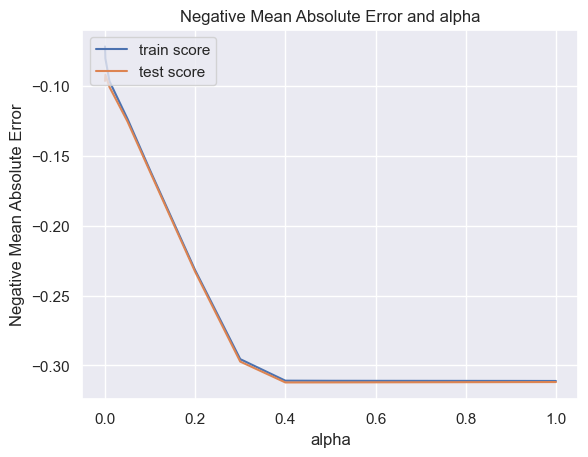

In [100]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [101]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-1.82262243e-02,  0.00000000e+00,  1.48520735e-02,  1.24362987e-01,
        3.56758151e-02,  6.86799588e-02,  3.54501395e-02,  0.00000000e+00,
        1.18352870e-02,  0.00000000e+00,  2.16678491e-02,  1.31625809e-03,
        0.00000000e+00, -0.00000000e+00,  1.19655194e-01,  2.50114557e-02,
        0.00000000e+00,  1.50791785e-02,  1.20721026e-03,  0.00000000e+00,
       -4.22140599e-03,  2.86246915e-02,  4.46982244e-02,  7.22089257e-03,
        0.00000000e+00, -0.00000000e+00,  1.19897861e-04,  8.12689937e-03,
       -9.16922633e-04,  0.00000000e+00, -4.72592112e-04,  0.00000000e+00,
        0.00000000e+00,  1.64576900e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [104]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8647870461834812
0.8348195551842336
